In [1]:
import sys
from pathlib import Path

# sys.path.insert(0,str(Path(r'C:\Users\ku51015\CHMURA\mystuff\Graph-Vizualisation-Rating-Metric').resolve()))
sys.path.insert(0,str(Path(r'C:\Users\Kinga\Desktop\MAGISTERKA\Graph-Vizualisation-Rating-Metric-2').resolve()))

from graph_generating_script import *
from graph_metric_script import *
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np
import pickle

In [8]:
# example_posdf = pd.read_csv(r'pos_dfs\0_circular_layout.csv')
# with open('graph_objects\graph_0.pkl', 'rb') as f:
#     G = pickle.load(f)

In [9]:
# zrobic df gdzie jest: graph_id+layout(czyli nazwa pliku), score, i oliczone wartosci kazdego z komponentow

# MAIN LOOP

In [2]:
annotations = pd.read_excel('BA_annotations_scores.xlsx')

In [3]:
import os 
posdf_dir = 'pos_dfs'
graph_dir = 'graph_objects'


calculated_components_df = pd.DataFrame(columns=['posdf_id', 'score', 'node_distribution', 'distance_to_borderlines', 'edge_length_sum', 'edge_node_distance_contribution', 'count_edge_crossings','communities_closeness', 'sum_of_angles', 'symmetry'])

# Iterate through files in the posdf_dir
for posdf_file in os.listdir(posdf_dir):
    # reading data
    if posdf_file.endswith('.csv'):
        posdf = pd.read_csv(os.path.join(posdf_dir, posdf_file))
        print(f'Loaded {posdf_file}')

    graph_id = posdf_file.split('_')[0]
    layout = posdf_file.split('.')[0]
    layout = layout[2:]
    score = annotations[annotations['graph_id'] == int(graph_id)][layout].values[0]


    graph_file = 'graph_'+graph_id+'.pkl' 
    with open(os.path.join(graph_dir, graph_file), 'rb') as f:
        G = pickle.load(f)
    components_dict = {
        'posdf_id': posdf_file,
        'score': score,
        'node_distribution': node_distribution(posdf),
        'distance_to_borderlines': distance_to_borderlines(posdf),
        'edge_length_sum': edge_length_sum(G, posdf),
        'edge_node_distance_contribution': edge_node_distance_contribution(G, posdf)[0],
        'count_edge_crossings': count_edge_crossings(G, posdf),
        'communities_closeness' : intra_cluster_distance(G, posdf)['overall_sum'],
        'sum_of_angles' : sum_of_angles(G, posdf),
        'symmetry' : measure_graph_symmetry(G, posdf)
    }
    new_row_df = pd.DataFrame([components_dict])
    calculated_components_df = pd.concat([calculated_components_df, new_row_df], ignore_index=True)

Loaded 0_davidson_harel.csv


C:\Users\Kinga\AppData\Local\Temp\ipykernel_5048\2505088977.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calculated_components_df = pd.concat([calculated_components_df, new_row_df], ignore_index=True)


Loaded 0_graphopt.csv
Loaded 0_kamada_kawai.csv
Loaded 0_lgl.csv
Loaded 0_random.csv
Loaded 1_davidson_harel.csv
Loaded 1_graphopt.csv
Loaded 1_kamada_kawai.csv
Loaded 1_lgl.csv
Loaded 1_random.csv
Loaded 2_davidson_harel.csv
Loaded 2_graphopt.csv
Loaded 2_kamada_kawai.csv
Loaded 2_lgl.csv
Loaded 2_random.csv
Loaded 3_davidson_harel.csv
Loaded 3_graphopt.csv
Loaded 3_kamada_kawai.csv
Loaded 3_lgl.csv
Loaded 3_random.csv
Loaded 4_davidson_harel.csv
Loaded 4_graphopt.csv
Loaded 4_kamada_kawai.csv
Loaded 4_lgl.csv
Loaded 4_random.csv
Loaded 5_davidson_harel.csv
Loaded 5_graphopt.csv
Loaded 5_kamada_kawai.csv
Loaded 5_lgl.csv
Loaded 5_random.csv
Loaded 6_davidson_harel.csv
Loaded 6_graphopt.csv
Loaded 6_kamada_kawai.csv
Loaded 6_lgl.csv
Loaded 6_random.csv


In [4]:
calculated_components_df

,posdf_id,score,node_distribution,distance_to_borderlines,edge_length_sum,edge_node_distance_contribution,count_edge_crossings,communities_closeness,sum_of_angles,symmetry
0,0_davidson_harel.csv,3,3.747543,85.340,1.261940e+02,2.537804e+01,64,3.968964e+01,13.672960,7.000851e-01
1,0_graphopt.csv,4,0.027961,8.580,1.495039e+04,1.725241e-01,49,4.578654e+02,13.939920,9.137241e-03
2,0_kamada_kawai.csv,4,30.239679,10040.991,1.255195e+01,1.867351e+02,16,1.451807e+01,13.660800,9.229136e-01
3,0_lgl.csv,1,0.171110,0.000,1.132373e+13,1.541177e+00,16,1.004505e+07,11.975601,7.337175e-12
4,0_random.csv,2,444.717155,214.140,6.146105e+00,3.536558e+06,361,5.590635e+00,11.325085,9.721120e-01
5,1_davidson_harel.csv,5,5.557422,0.155,2.358314e+02,6.709671e+01,121,7.931787e+01,38.810755,4.305812e-01
6,1_graphopt.csv,3,0.048390,232.447,2.450323e+04,3.372227e+00,729,9.029709e+02,38.553995,6.858546e-03
7,1_kamada_kawai.csv,4,80.047888,10038.647,1.376020e+01,4.375912e+03,441,1.902946e+01,38.791716,9.225810e-01
8,1_lgl.csv,1,0.229935,0.000,1.348873e+13,4.180698e+00,625,1.240571e+07,38.274050,2.550870e-11
9,1_random.csv,2,760.664663,227.109,7.075462e+00,8.006440e+05,2025,1.006448e+01,30.799989,9.762055e-01


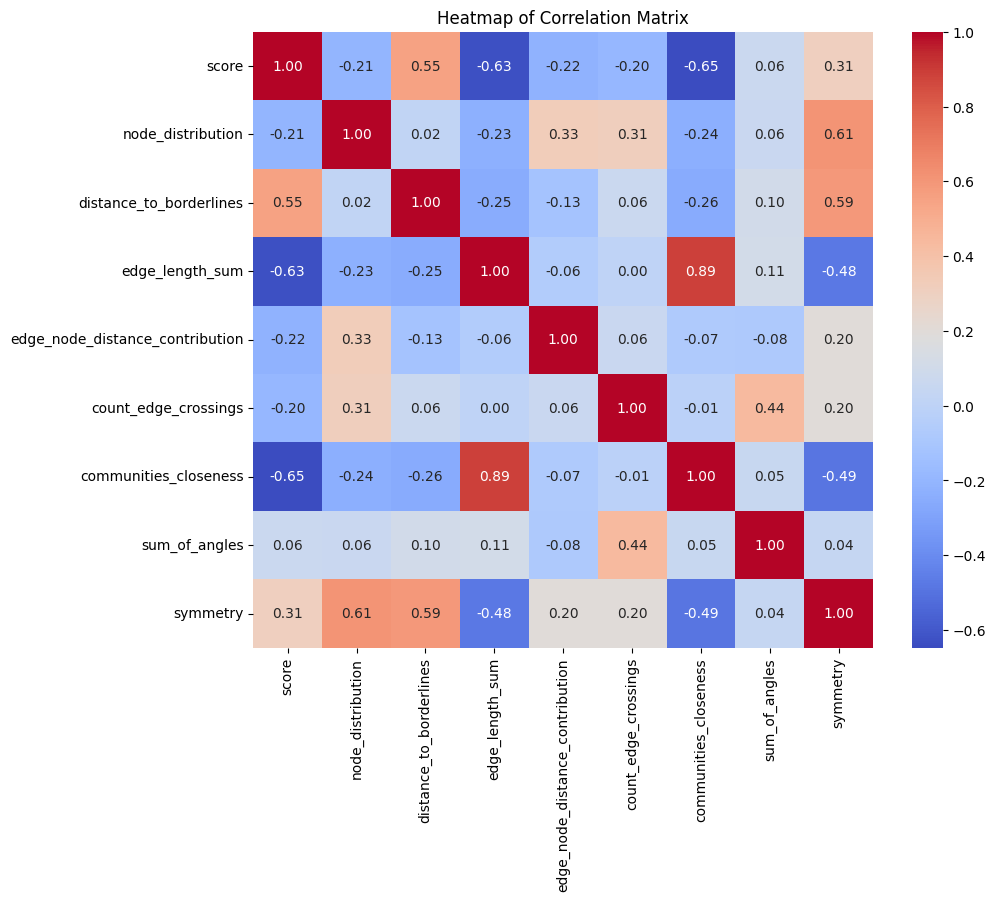

In [5]:
# Calculate the correlation matrix
import seaborn as sns

calculated_components_df_numeric = calculated_components_df.drop(columns=['posdf_id'])
correlation_matrix = calculated_components_df_numeric.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

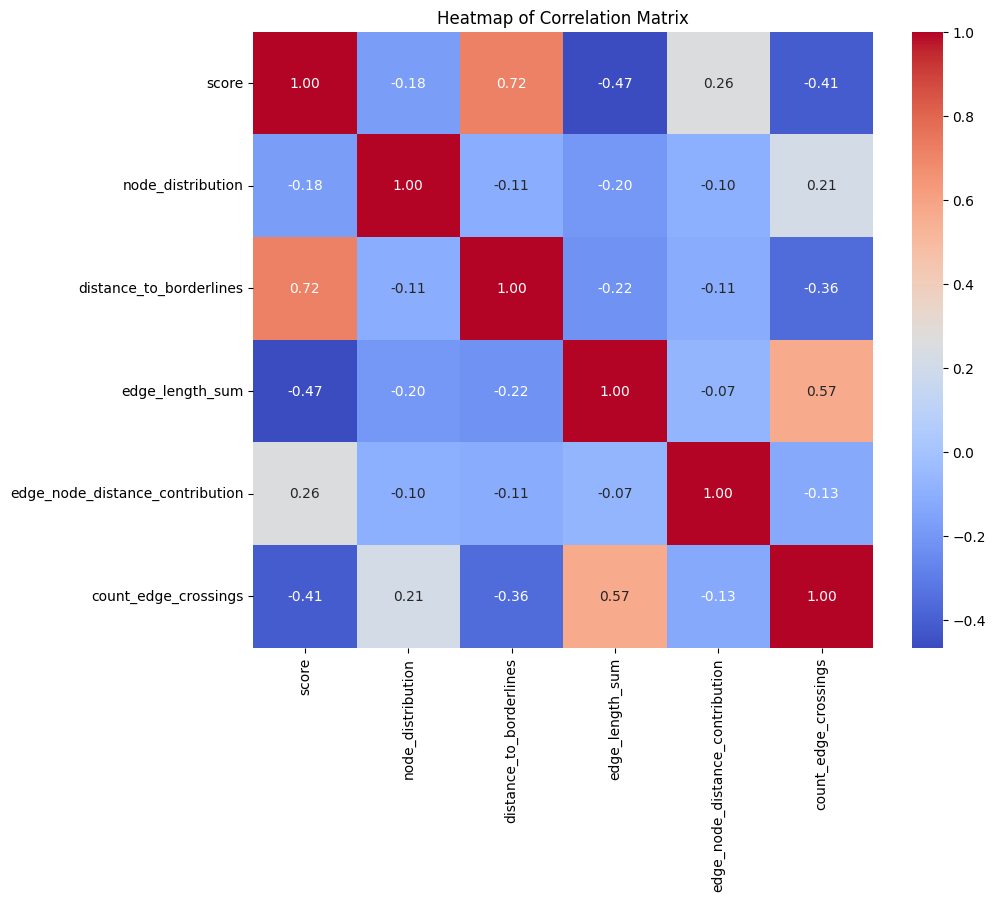

In [ ]:
# Calculate the correlation matrix


# without davidson harel:
import seaborn as sns

calculated_components_df_numeric = calculated_components_df.drop(columns=['posdf_id'])
correlation_matrix = calculated_components_df_numeric.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()